In [1]:
# Load required packages
library(alakazam)
library(tigger)
library(dplyr)
library(scales)
library(ggplot2)
library(airr)
library(shazam)
library(ape)
library(dowser)

# read the database
db <- read_airr("changeo_10x_output_032822/filtered_contig_heavy_productive-T.tsv")

Loading required package: ggplot2

As of v1.0.0 the AIRR Rearrangement schema is now the default file format.
A description of the standard is available at https://docs.airr-community.org.
The legacy Change-O format is supported through arguments to each function
that allow the input column names to be explicitly defined.

As of v1.0.0 the AIRR Rearrangement schema is now the default file format.
A description of the standard is available at https://docs.airr-community.org.
The legacy Change-O format is supported through arguments to each function
that allow the input column names to be explicitly defined.


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


As of v1.0.0 the AIRR Rearrangement schema is now the default file format.
A description of the standard is available at https://docs.airr-community.org.
The legacy Change-O format is 

In [2]:
# read in the data
db <- readIgphyml("changeo_10x_output_032822/filtered_contig_heavy_germ-pass_igphyml-pass.tab", format="phylo",
      branches="mutations")

null device 
          1

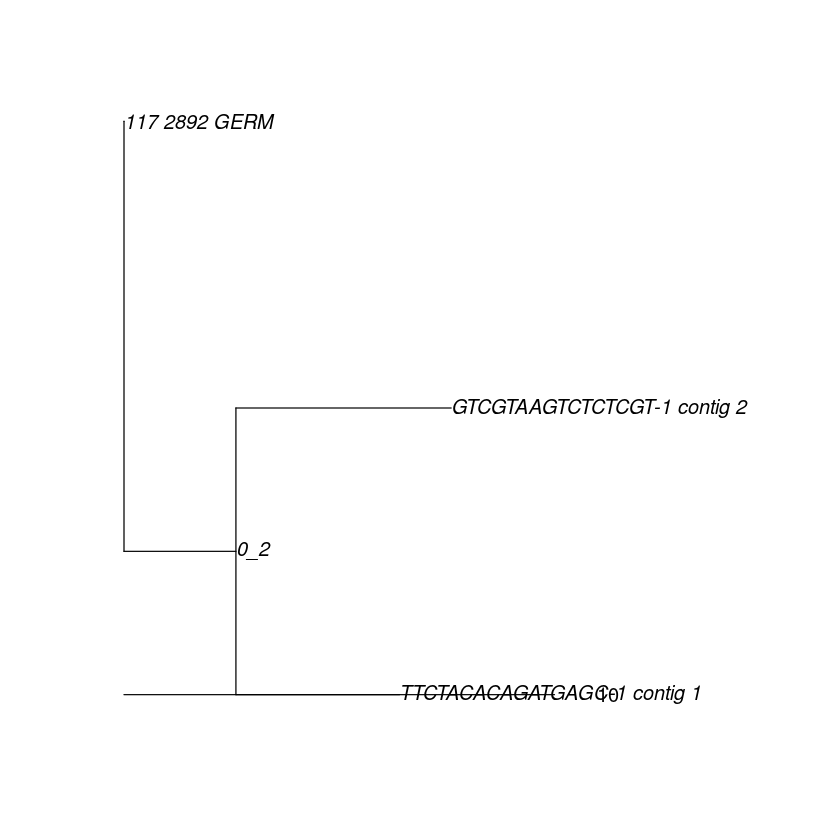

In [3]:
plot(db$trees[[1]],show.node.label=TRUE)
add.scale.bar(length=10)
dev.off()

In [4]:
# read the database
db <- read_airr("changeo_10x_output_032822/filtered_contig_heavy_germ-pass.tsv")

glimpse(db)

Rows: 4,474
Columns: 62
$ sequence_id               <chr> "CGAGCCATCAAGATCC-1_contig_2", "ACTTTCACAGG…
$ sequence                  <chr> "TGGGGAACAACATATGTCCAATGTCCTCTCCACAGGCACTGA…
$ rev_comp                  <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, F…
$ productive                <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, T…
$ v_call                    <chr> "IGHV1-18*01", "IGHV1-18*01", "IGHV1-61*01"…
$ d_call                    <chr> "IGHD2-9*01", "IGHD2-3*01", "IGHD2-4*01,IGH…
$ j_call                    <chr> "IGHJ3*01", "IGHJ3*01", "IGHJ2*01", "IGHJ2*…
$ sequence_alignment        <chr> "GAGGTCCAGCTGCAACAGTCTGGACCT...GAGCTGGTGAAG…
$ germline_alignment        <chr> "GAGGTCCAGCTGCAACAGTCTGGACCT...GAGCTGGTGAAG…
$ junction                  <chr> "TGTGCAAGATCGTCCTACTACGGTTCGTTTGCTTACTGG", …
$ junction_aa               <chr> "CARSSYYGSFAYW", "CARNDGYFWFAYW", "CASIAYDY…
$ v_cigar                   <chr> "116S294=", "111S294=", "77S293=", "112S218…
$ d_cigar                   

In [5]:
clones <- formatClones(
db,
seq = "sequence_alignment",
clone = "clone_id",
subclone = "subclone_id",
nproc = 16,
chain = "H",
heavy = "IGH",
cell = "cell_id",
locus = "locus",
minseq = 2,
split_light = FALSE,
majoronly = FALSE,
columns = NULL,
)

print(clones)

# A tibble: 3 x 4
  clone_id  data       locus  seqs
  <chr>     <list>     <chr> <int>
1 117_2892  <airrClon> IGH       2
2 1434_717  <airrClon> IGH       2
3 4556_2349 <airrClon> IGH       2


In [6]:
clones <- getTrees(clones, build="igphyml", 
    exec="/usr/local/share/igphyml/src/igphyml", nproc=16)

print(clones)

clones$parameters[[1]]$omega_mle

Warning message in buildIgphyml(data, igphyml = exec, temp_path = file.path(dir, :
“Dowser igphyml doesn't mask split codons!”


# A tibble: 3 x 5
  clone_id  data       locus  seqs trees       
  <chr>     <list>     <chr> <int> <named list>
1 117_2892  <airrClon> IGH       2 <phylo>     
2 1434_717  <airrClon> IGH       2 <phylo>     
3 4556_2349 <airrClon> IGH       2 <phylo>     


Warning message:
“Unknown or uninitialised column: `parameters`.”


NULL

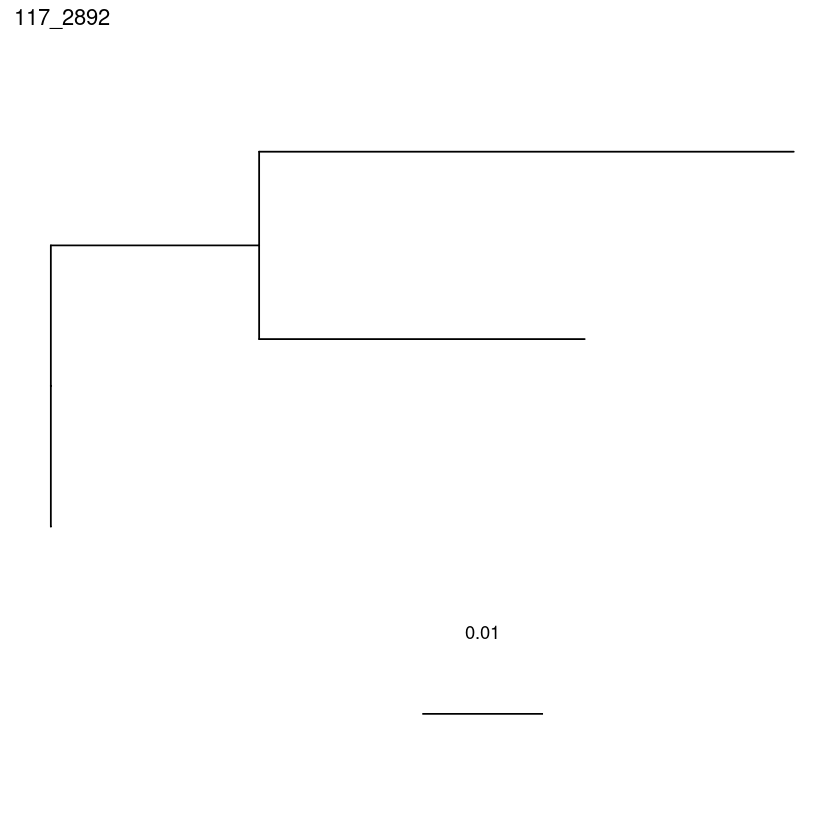

[[1]]

[[2]]

[[3]]


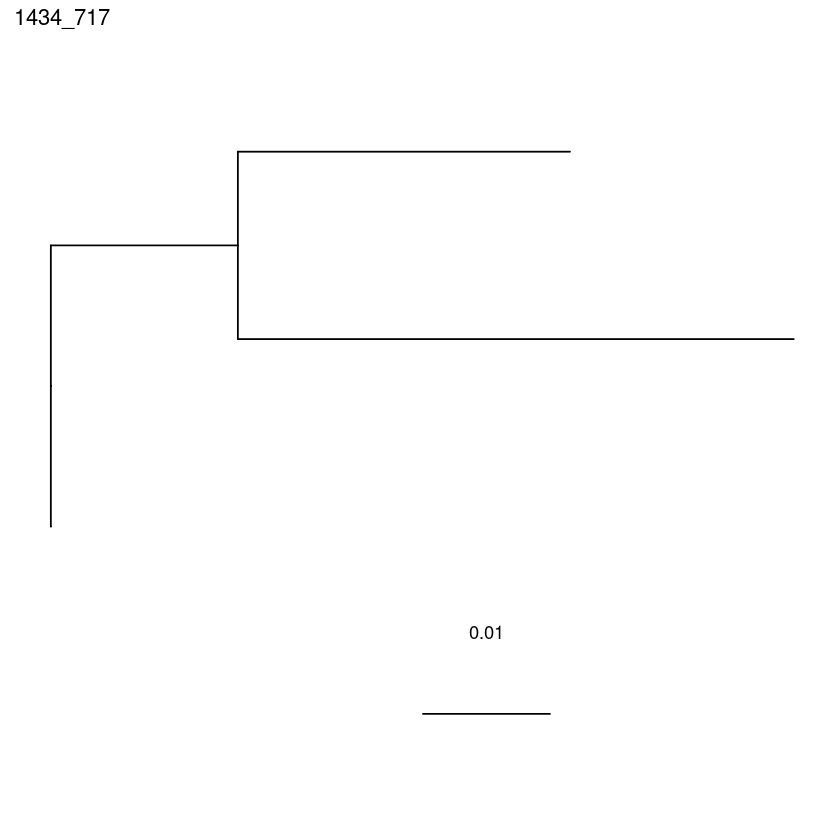

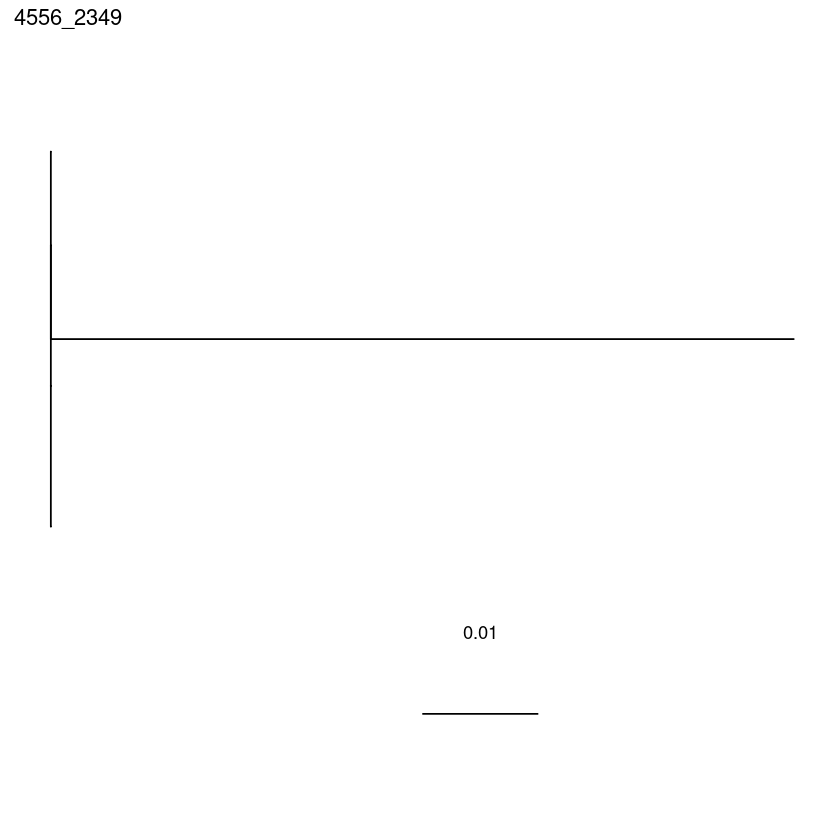

In [7]:
plotTrees(clones)

In [8]:
getTrees(
clones,
trait = NULL,
id = NULL,
dir = NULL,
modelfile = NULL,
build = "pratchet",
exec = NULL,
igphyml = NULL,
fixtrees = FALSE,
nproc = 16,
quiet = 0,
rm_temp = TRUE,
)

clone_id  data                                                    locus seqs
1 117_2892  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   2   
2 1434_717  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   2   
3 4556_2349 <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   2   
  trees                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'sequence_id' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. pa

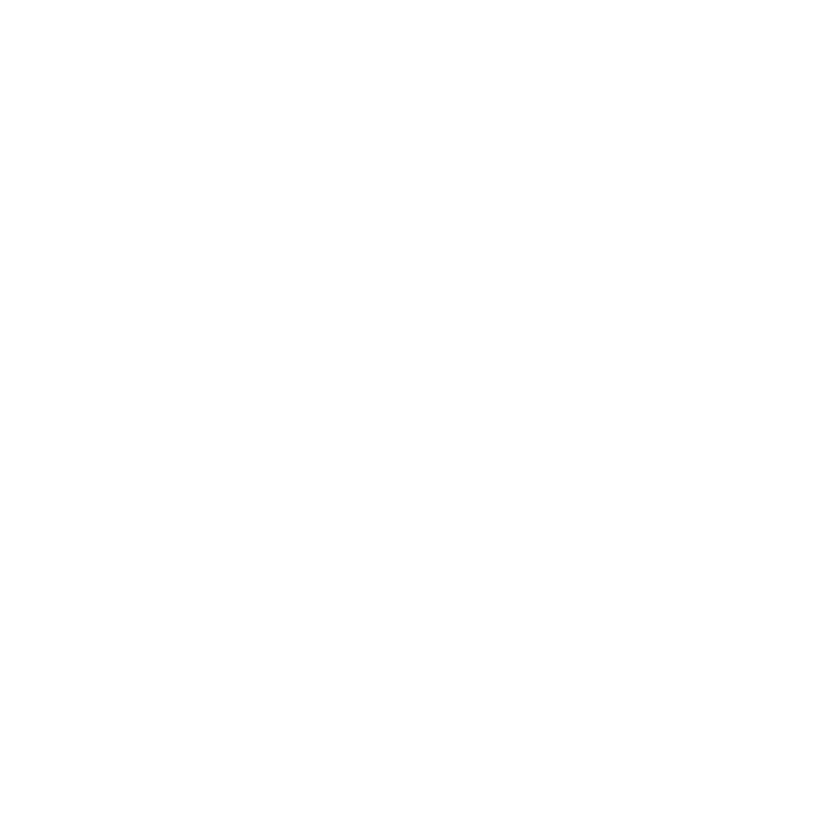

In [9]:
plotTrees(clones,
         nodes = FALSE,
         tips = "sequence_id")